### Build a naive Bayes model on the data set for classifying the ham and spam

#### Importing Libearies 

In [27]:
import pandas as pd 

#### Importing the Dataset 

In [28]:
data = pd.read_csv('F://Data_Set/sms_raw_NB.csv',encoding = "ISO-8859-1")    

In [29]:
data.head() 

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or å£10,000..."
4,spam,okmail: Dear Dave this is your final notice to...


Check any Null Value Present in the dataset or Not 

In [30]:
data.isnull().sum() 

type    0
text    0
dtype: int64

Information of the data 

In [31]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5559 entries, 0 to 5558
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    5559 non-null   object
 1   text    5559 non-null   object
dtypes: object(2)
memory usage: 87.0+ KB


#### Data Cleaning 

In [32]:
import re #regular expression
import string

def clean_text(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x) 

In [10]:
data['text'] = data.text.apply(clean)
data.text 

0        hope you are having a good week just checking in
1                                    kgive back my thanks
2               am also doing in cbe only but have to pay
3       complimentary  star ibiza holiday or å£ cash n...
4       okmail dear dave this is your final notice to ...
                              ...                        
5554    you are a great role model you are giving so m...
5555    awesome i remember the last time we got somebo...
5556    if you dont your prize will go to another cust...
5557    sms ac jsco energy is high but u may not know ...
5558                      shall call now dear having food
Name: text, Length: 5559, dtype: object

In [33]:
#Word frequency
freq = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq 

to      2137
you     1615
I       1464
a       1333
the     1200
u        854
and      852
in       799
is       788
i        748
for      649
my       627
of       591
me       560
your     543
on       486
have     476
2        455
that     418
are      397
dtype: int64

In [34]:
#removing stopwords
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')
data['text'] = data['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop)) 

[nltk_data] Downloading package stopwords to C:\Users\Nakul
[nltk_data]     Raje\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [35]:
#word frequency after removal of stopwords
freq_Sw = pd.Series(' '.join(data['text']).split()).value_counts()[:20] # for top 20
freq_Sw 

I       1464
u        854
2        455
call     376
get      325
U        301
ur       296
I'm      285
#        279
You      265
4        254
.        242
go       237
know     224
like     224
got      204
come     199
&        194
?        182
...      170
dtype: int64

In [36]:
# count vectoriser tells the frequency of a word.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
vectorizer = CountVectorizer(min_df = 1, max_df = 5)
X = vectorizer.fit_transform(data["text"])
word_freq_df = pd.DataFrame({'term': vectorizer.get_feature_names(), 'occurrences':np.asarray(X.sum(axis=0)).ravel().tolist()})
word_freq_df['frequency'] = word_freq_df['occurrences']/np.sum(word_freq_df['occurrences'])
#print(word_freq_df.sort('occurrences',ascending = False).head()) 

In [37]:
word_freq_df.head(30) 

,term,occurrences,frequency
0,000pes,1,0.000082
1,008704050406,2,0.000163
2,0089,1,0.000082
3,0121,1,0.000082
4,01223585236,1,0.000082
5,01223585334,2,0.000163
6,0125698789,1,0.000082
7,0207,3,0.000245
8,02072069400,1,0.000082
9,02073162414,2,0.000163


In [38]:
#TFIDF - Term frequency inverse Document Frequencyt
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features= 1000, max_df = 0.5, smooth_idf=True) #keep top 1000 words
doc_vec = vectorizer.fit_transform(data["text"])
names_features = vectorizer.get_feature_names()
dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns = names_features) 

In [39]:
df 

,00,000,03,04,0800,08000839402,08000930705,10,100,1000,...,yes,yesterday,yo,yr,yup,ââ,ââèït,ûªs,ûªt,ûï
0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.318582,0.0,0.0,0.0,0.0,0.0,0.301802,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5554,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5555,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5556,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5557,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### N-gram

In [40]:
#Bi-gram
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  #for tri-gram, put ngram_range=(3,3)
            max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]

In [41]:
top2_words = get_top_n2_words(data["text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
top2_df.head(50)

,Bi-gram,Freq
0,please call,55
1,co uk,49
2,call later,48
3,ll call,45
4,let know,40
5,sorry ll,39
6,take care,38
7,good morning,32
8,right now,29
9,po box,28


[Text(0, 0, 'please call'),
 Text(0, 0, 'co uk'),
 Text(0, 0, 'call later'),
 Text(0, 0, 'll call'),
 Text(0, 0, 'let know'),
 Text(0, 0, 'sorry ll'),
 Text(0, 0, 'take care'),
 Text(0, 0, 'good morning'),
 Text(0, 0, 'right now'),
 Text(0, 0, 'po box'),
 Text(0, 0, 'to claim'),
 Text(0, 0, 'your mobile'),
 Text(0, 0, 'guaranteed call'),
 Text(0, 0, 'new year'),
 Text(0, 0, '1000 cash'),
 Text(0, 0, 'prize guaranteed'),
 Text(0, 0, 'we re'),
 Text(0, 0, 'ok lor'),
 Text(0, 0, 'pls send'),
 Text(0, 0, 'every week')]

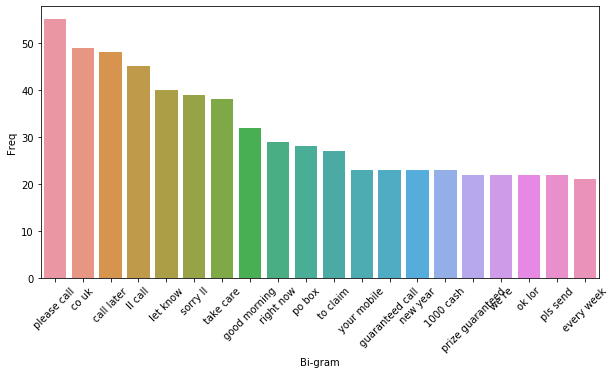

In [42]:
#Bi-gram plot
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_bigram["Bi-gram"]) 

In [43]:
#Tri-gram
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n] 

In [44]:
top3_words = get_top_n3_words(data["text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]

In [45]:
top3_df 

,Tri-gram,Freq
0,ll call later,41
1,sorry ll call,38
2,prize guaranteed call,21
3,urgent your mobile,18
4,happy new year,18
...,...,...
195,free call the,6
196,call the mobile,6
197,the mobile update,6
198,had mobile 11mths,6


[Text(0, 0, 'ill call later'),
 Text(0, 0, 'sorry ill call'),
 Text(0, 0, 'prize guaranteed call'),
 Text(0, 0, 'call land line'),
 Text(0, 0, 'happy new year'),
 Text(0, 0, 'private account statement'),
 Text(0, 0, 'guaranteed call land'),
 Text(0, 0, 'call identifier code'),
 Text(0, 0, 'land line claim'),
 Text(0, 0, 'draw shows prize'),
 Text(0, 0, 'shows prize guaranteed'),
 Text(0, 0, 'identifier code expires'),
 Text(0, 0, 'pls send message'),
 Text(0, 0, 'account statement shows'),
 Text(0, 0, 'statement shows unredeemed'),
 Text(0, 0, 'camcorder reply call'),
 Text(0, 0, 'cant pick phone'),
 Text(0, 0, 'pick phone right'),
 Text(0, 0, 'phone right pls'),
 Text(0, 0, 'right pls send')]

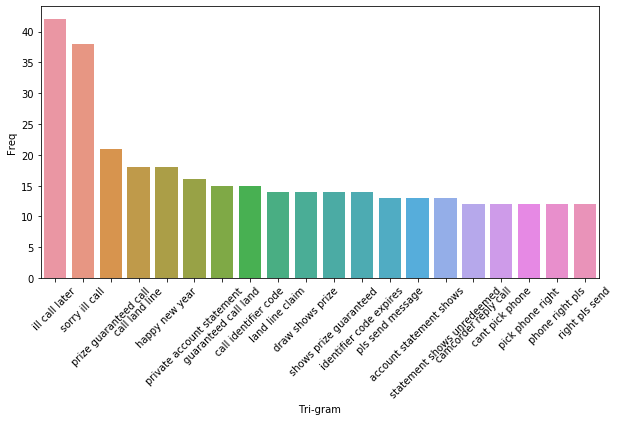

In [24]:
#Tri-gram plot
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot=sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=45,labels = top20_trigram["Tri-gram"])

#### WordCloud 

In [46]:
string_Total = " ".join(data["text"]) 

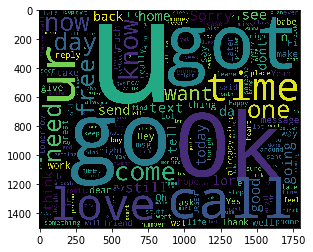

In [47]:
from wordcloud import WordCloud
wordcloud_stw = WordCloud(
                background_color= 'black',
                width = 1800,
                height = 1500
                ).generate(string_Total)
plt.imshow(wordcloud_stw) 

#### Using naive bayes for classification algorithm 

In [48]:
data.head() 

,type,text
0,ham,Hope good week. Just checking
1,ham,K..give back thanks.
2,ham,Am also cbe only. But pay.
3,spam,"complimentary 4 STAR Ibiza Holiday å£10,000 ca..."
4,spam,okmail: Dear Dave final notice collect 4* Tene...


In [49]:
def split_into_words(i):
    return (i.split(" "))

In [50]:
from sklearn.model_selection import train_test_split

email_train,email_test = train_test_split(data,test_size=0.3) 

In [51]:
email_test 

,type,text
5134,ham,Lil fever:) fine:)
4551,ham,"Wow really shocking scary, cant imagine second..."
2698,ham,"Well officially philosophical hole, u wanna ca..."
1278,ham,Not sure I stomach ...
4110,ham,You ready * big day tomorrow?
...,...,...
3522,ham,I (Career Tel) added u contact INDYAROCKS.COM ...
1843,ham,"LOOK AT AMY URE A BEAUTIFUL, INTELLIGENT WOMAN..."
5034,ham,Also bringing galileo dobby
4205,ham,Okie...


In [52]:
emails_bow = CountVectorizer(analyzer=split_into_words).fit(data.text) 

In [53]:
# For all messages
all_emails_matrix = emails_bow.transform(data.text)
all_emails_matrix.shape 

(5559, 15373)

In [54]:
# For training messages
train_emails_matrix = emails_bow.transform(email_train.text)
train_emails_matrix.shape # (3891,8175)

# For testing messages
test_emails_matrix = emails_bow.transform(email_test.text)
test_emails_matrix.shape # (1668,8175) 

(1668, 15373)

In [55]:
####### Without TFIDF matrices ########################
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_emails_matrix,email_train.type)
train_pred_m = classifier_mb.predict(train_emails_matrix)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 98%

test_pred_m = classifier_mb.predict(test_emails_matrix)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%



In [56]:
accuracy_test_m 

0.9640287769784173

#### Using TFIDF 

In [57]:
from sklearn.feature_extraction.text import TfidfTransformer

# Learning Term weighting and normalizing on entire emails
tfidf_transformer = TfidfTransformer().fit(all_emails_matrix)

# Preparing TFIDF for train emails
train_tfidf = tfidf_transformer.transform(train_emails_matrix)

train_tfidf.shape # (3891, 6661)

# Preparing TFIDF for test emails
test_tfidf = tfidf_transformer.transform(test_emails_matrix)

test_tfidf.shape #  (1668, 6661)


(1668, 15373)

In [58]:
test_tfidf 

<1668x15373 sparse matrix of type '<class 'numpy.float64'>'
	with 17495 stored elements in Compressed Sparse Row format>

In [59]:
# Preparing a naive bayes model on training data set 

from sklearn.naive_bayes import MultinomialNB as MB


# Multinomial Naive Bayes
classifier_mb = MB()
classifier_mb.fit(train_tfidf,email_train.type)
train_pred_m = classifier_mb.predict(train_tfidf)
accuracy_train_m = np.mean(train_pred_m==email_train.type) # 96%

test_pred_m = classifier_mb.predict(test_tfidf)
accuracy_test_m = np.mean(test_pred_m==email_test.type) # 96%


In [60]:
accuracy_test_m 

0.9424460431654677